_This notebook contains code and comments from Section 7.1 of the book [Ensemble Methods for Machine Learning](https://www.manning.com/books/ensemble-methods-for-machine-learning). Please see the book for additional details on this topic. This notebook and code are released under the [MIT license](https://github.com/gkunapuli/ensemble-methods-notebooks/blob/master/LICENSE)._

## 7.1	Regression

### 7.1.1 Linear vs. Nonlinear Regression for Continuous Labels
Different regularization methods serve different modeling needs and can handle different types of data issues. The most common data issue that linear regression models must contend with is that of multicollinearity.

Multicollinearity in data arises when one feature depends on others, that is, when the features are correlated with each other. In practical terms, this means that both features convey nearly the same information, and it should be possible to train a less complex model by selecting and using only one of them. To understand the impact of different regularization methods, we’ll explicitly create a data set with multicollinearity, and try different regularization methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

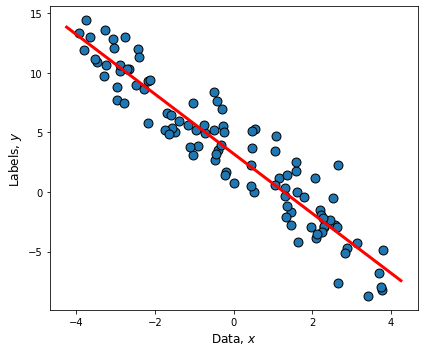

In [2]:
n = 100

rng = np.random.default_rng(seed=42)
X = rng.uniform(low=-4.0, high=4.0, size=(n, 1))

f = lambda x: -2.5 * x + 3.2
y = f(X)  # Generate labels according to this linear function
y += rng.normal(scale=0.15 * np.max(y), size=(n, 1))

fig = plt.figure(figsize=(6, 5))
plt.scatter(X, y, s=80, marker='o', edgecolor='k')

xTrue = np.linspace(start=-4.25, stop=4.25, num=100)
yTrue = f(xTrue)
plt.plot(xTrue, yTrue, c='r', linewidth=3)

plt.xlabel('Data, $x$', fontsize=12)
plt.ylabel('Labels, $y$', fontsize=12)

fig.tight_layout()
# plt.savefig('./figures/CH07_F01_Kunapuli.png', format='png', dpi=300, bbox_inches='tight')
# plt.savefig('./figures/CH07_F01_Kunapuli.pdf', format='pdf', dpi=300, bbox_inches='tight')

Now, let's create a 2d data set from this 1d data set that contains correlations, that is one data column (or feature) depends on another. In this case, the second column is a multiple of the first (with some noise, of course).

In [3]:
# Split into training and test sets
X = np.concatenate([X, 3*X + 0.25*rng.uniform(size=(n, 1))], axis=1)
from sklearn.model_selection import train_test_split
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.25, random_state=42)
print(X.shape, Xtrn.shape, Xtst.shape, ytrn.shape, ytst.shape)

(100, 2) (75, 2) (25, 2) (75, 1) (25, 1)


Train four different models to see how they fit this synthetic dataset with correlations:
* Ordinary least squares regression
* Ridge regression 
* LASSO
* Elastic Net

**Listing 7.1**: Linear regression models

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
models = ['OLS Regression', 'Ridge Regression', 'LASSO', 'Elastic Net']
regressors = [LinearRegression(),
              Ridge(alpha=0.5),
              Lasso(alpha=0.5),
              ElasticNet(alpha=0.5, l1_ratio=0.5)]

for (model, regressor) in zip(models, regressors):
    print(regressor)
    regressor.fit(Xtrn, ytrn)
    ypred = regressor.predict(Xtst)        # Get predictions on the test set
    mse = mean_squared_error(ytst, ypred)  # Compute the test error using MSE as the metric
    mad = mean_absolute_error(ytst, ypred)

    print('{0}\'s test set performance: MSE = {1:4.3f}, MAD={2:4.3f}'.format(model, mse, mad))
    print('{0} model: {1} * x + {2}\n'.format(model, regressor.coef_, regressor.intercept_))

LinearRegression()
OLS Regression's test set performance: MSE = 2.786, MAD=1.300
OLS Regression model: [[-1.46397043 -0.32220113]] * x + [3.3541317]

Ridge(alpha=0.5)
Ridge Regression's test set performance: MSE = 2.760, MAD=1.301
Ridge Regression model: [[-0.34200341 -0.69592603]] * x + [3.39572877]

Lasso(alpha=0.5)
LASSO's test set performance: MSE = 2.832, MAD=1.304
LASSO model: [-0.         -0.79809073] * x + [3.41650036]

ElasticNet(alpha=0.5)
Elastic Net's test set performance: MSE = 2.824, MAD=1.304
Elastic Net model: [-0.         -0.79928498] * x + [3.41567834]



In [5]:
print(regressor)

ElasticNet(alpha=0.5)


Nonlinear Regression examples: Decision Trees and Artificial Neural Networks (multilayer perceptrons)

Decision Trees test set performance: MSE = 0.038, MAD=0.160
Neural Networks test set performance: MSE = 0.044, MAD=0.159


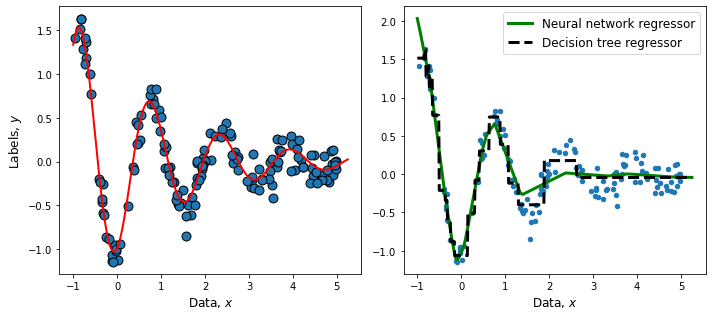

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# Generate and visualize data
n = 150
X = rng.uniform(low=-1.0, high=5.0, size=(n, 1))
g = lambda x: np.exp(-0.5*x) * np.sin(1.25 * np.pi * x - 1.414)
y = g(X)  # Generate labels according to this nonlinear function
y += rng.normal(scale=0.08 * np.max(y), size=(n, 1))  
y = y.reshape(-1, )

xTrue = np.linspace(start=-1, stop=5.25, num=500)
yTrue = g(xTrue)
ax[0].plot(xTrue, yTrue, c='r', linewidth=2)
ax[0].scatter(X, y, s=80, marker='o', edgecolor='k')
ax[0].set_xlabel('Data, $x$', fontsize=12)
ax[0].set_ylabel('Labels, $y$', fontsize=12)
fig.tight_layout()

# Split into train and test sets
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.25, random_state=42)

# Train nonlinear classifiers
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(Xtrn, ytrn)
ypred_dt = dt.predict(Xtst)
mse = mean_squared_error(ytst, ypred_dt)
mad = mean_absolute_error(ytst, ypred_dt)
print('Decision Tree''s test set performance: MSE = {0:4.3f}, MAD={1:4.3f}'.format(mse, mad))

from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(hidden_layer_sizes=(50, 50, 50), alpha=0.001, max_iter=1000)
ann.fit(Xtrn, ytrn.reshape(-1, ))
ypred_ann = ann.predict(Xtst)
mse = mean_squared_error(ytst, ypred_ann)
mad = mean_absolute_error(ytst, ypred_ann)
print('Neural Network''s test set performance: MSE = {0:4.3f}, MAD={1:4.3f}'.format(mse, mad))

ax[1].plot(xTrue, ann.predict(xTrue.reshape(-1, 1)), c='g', linewidth=3, linestyle='-')
ax[1].plot(xTrue, dt.predict(xTrue.reshape(-1, 1)), c='k', linewidth=3, linestyle='--')
ax[1].set_xlabel('Data, $x$', fontsize=12)
ax[1].legend(['Neural network regressor', 'Decision tree regressor'], fontsize=12)
ax[1].scatter(X, y, s=20, marker='o')

fig.tight_layout()
# plt.savefig('./figures/CH07_F06_Kunapuli.png', format='png', dpi=300, bbox_inches='tight')
# plt.savefig('./figures/CH07_F06_Kunapuli.pdf', format='pdf', dpi=300, bbox_inches='tight')

---
### 7.1.2 Poisson Regression for Count Labels
There are often situations where we have to develop models where the labels are counts. In health informatics, for instance, we may wish to build a model to predict the number (essentially, the count) of doctor visits given patient data. One approach is to simply treat counts as continuous values, but this does not always work.

We can visualize the differences between continuous-valued targets and count-valued targets (below), which shows us that linear regression will not work well as the distribution (spread and shape) of the count labels is quite different from that of continuous labels.

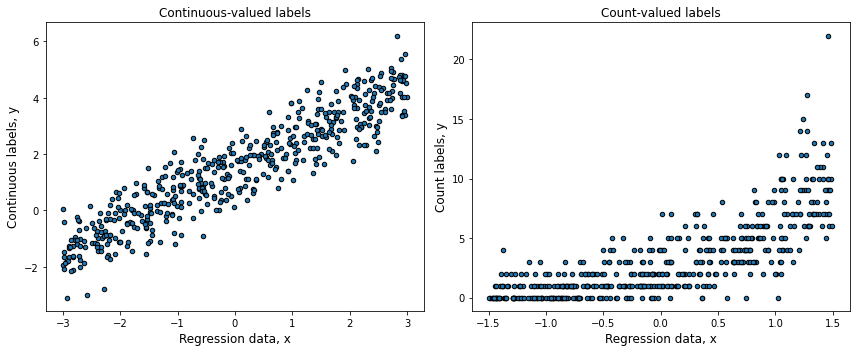

In [7]:
# Plot continuous vs. count data
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Generate continuous labels and some distributions
n = 500
X = rng.uniform(low=-3.0, high=3.0, size=(n, 1))
f = lambda x: x + 1.5
y = f(X)  # Generate labels according to this nonlinear function
y += rng.normal(scale=0.15 * np.max(y), size=(n, 1))

ax[0].scatter(X, y, s=20, edgecolor='k')
# xTrue = np.linspace(start=-3.05, stop=3.05, num=100)
# yTrue = f(xTrue)
# ax[0].plot(xTrue, yTrue, c='grey', linewidth=2, linestyle='--')
ax[0].set_xlabel('Regression data, x', fontsize=12)
ax[0].set_ylabel('Continuous labels, y', fontsize=12)
ax[0].set_title('Continuous-valued labels', fontsize=12)

# Generate count labels and some distributions
n = 500
X = rng.uniform(low=-1.5, high=1.5, size=(n, 1))
f = lambda x: x + 0.8
mu = np.exp(f(X))
y = rng.poisson(lam=mu, size=(n, 1))
ax[1].scatter(X, y, s=20, edgecolor='k')
# xTrue = np.linspace(start=-1.55, stop=1.55, num=100)
# yTrue = f(xTrue)
# ax[1].plot(xTrue, np.exp(yTrue), c='grey', linewidth=2, linestyle='--')
ax[1].set_xlabel('Regression data, x', fontsize=12)
ax[1].set_ylabel('Count labels, y', fontsize=12)
ax[1].set_title('Count-valued labels', fontsize=12)

fig.tight_layout()
# plt.savefig('./figures/CH07_F03_Kunapuli.png', format='png', dpi=300, bbox_inches='tight')
# plt.savefig('./figures/CH07_F03_Kunapuli.pdf', format='pdf', dpi=300, bbox_inches='tight')

---
Linear regression fits continuous-valued targets by assuming that the spread of the targets can be modeled by the continuous-valued normal distribution. More precisely, linear regression assumes that the predictions f(x) for an example x are distributed according to the normal distribution. We can visualize this below.

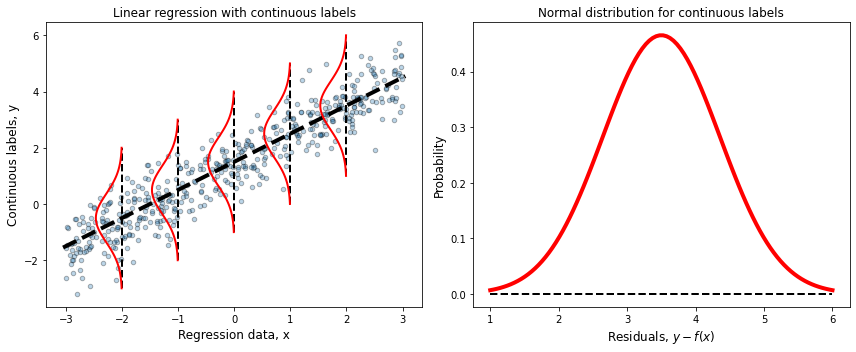

In [8]:
from scipy.stats import norm

# Initialize plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Generate continuous labels and some distributions
n = 500
X = rng.uniform(low=-3.0, high=3.0, size=(n, 1))
f = lambda x: x + 1.5
y = f(X)  # Generate labels according to this nonlinear function
y += rng.normal(scale=0.15 * np.max(y), size=(n, 1))

ax[0].scatter(X, y, s=20, edgecolor='k', alpha=0.3)

xTrue = np.linspace(start=-3.05, stop=3.05, num=100)
yTrue = f(xTrue)
ax[0].plot(xTrue, yTrue, c='k', linewidth=4, linestyle='--')

mu = scale=0.15 * np.max(y)
for x in np.arange(-2, 3, 1):
    yy = np.linspace(f(x)-2.5,  f(x) + 2.5, num=100)
    xx = np.full((100, ), x) - norm.pdf(yy, f(x), mu)
    ax[0].plot(np.full((100, ), x), yy, c='k', linewidth=2, linestyle='--')
    ax[0].plot(xx, yy, c='r', linewidth=2, linestyle='-')
ax[0].set_xlabel('Regression data, x', fontsize=12)
ax[0].set_ylabel('Continuous labels, y', fontsize=12)
# ax[0].scatter(2 - norm.pdf(f(2), f(2), mu), f(2), s=50, c='g')
ax[0].set_title('Linear regression with continuous labels', fontsize=12)

xx = np.linspace(f(2)-2.5,  f(2) + 2.5, num=100)
yy = norm.pdf(xx, f(2), mu)
ax[1].plot(xx, yy, linestyle='-', c='r', linewidth=4)
ax[1].plot(xx, np.full((len(xx), ), 0.0), linestyle='--', c='k', linewidth=2)
ax[1].set_xlabel('Residuals, $y - f(x)$', fontsize=12)
ax[1].set_ylabel('Probability', fontsize=12)
ax[1].set_title('Normal distribution for continuous labels', fontsize=12)
# ax[1].scatter(f(2), norm.pdf(f(2), f(2), mu), s=50, c='g')

fig.tight_layout()
# plt.savefig('./figures/CH07_F02_Kunapuli.png', format='png', dpi=300, bbox_inches='tight')
# plt.savefig('./figures/CH07_F02_Kunapuli.pdf', format='pdf', dpi=300, bbox_inches='tight')

---
Poisson regression, on the other hand, fits count-valued targets by assuming that the spread of the targets can be modeled by the discrete-valued Poisson distribution. More precisely, Poisson regression assumes that the predictions f(x) for an example x are distributed according to the Poisson distribution.

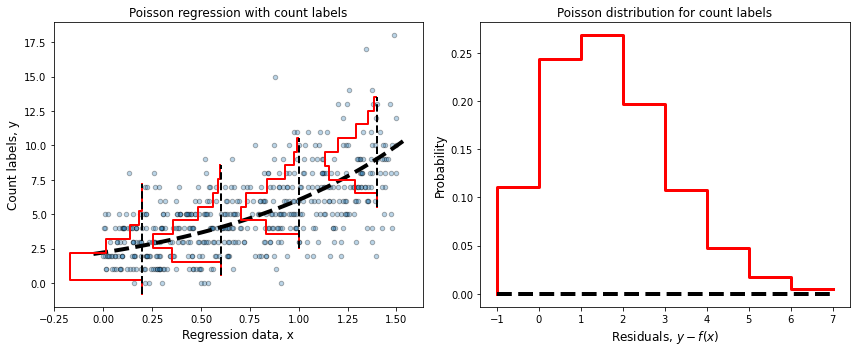

In [9]:
from scipy.stats import poisson

# Initialize plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Generate count labels and some distributions
n = 500
X = rng.uniform(low=0.0, high=1.5, size=(n, 1))
f = lambda x: x + 0.8
mu = np.exp(f(X))
y = rng.poisson(lam=mu, size=(n, 1))

ax[0].scatter(X, y, s=20, edgecolor='k', alpha=0.3)

xTrue = np.linspace(start=-0.05, stop=1.55, num=100)
yTrue = f(xTrue)
ax[0].plot(xTrue, np.exp(yTrue), c='k', linewidth=4, linestyle='--')

x = 0.5
for x in [0.2, 0.6, 1.0, 1.4]:
    xx = np.arange(-1, 8)
    dist = poisson(f(x))
    yy = -dist.pmf(xx) + x
    ax[0].step(yy, xx + np.exp(f(x)) - 2.5, linewidth=2, c='r')
    ax[0].plot(np.full((len(xx), ), x), xx + np.exp(f(x)) - 2.5, c='k', linewidth=2, linestyle='--')
    
ax[0].set_xlabel('Regression data, x', fontsize=12)
ax[0].set_ylabel('Count labels, y', fontsize=12)
ax[0].set_title('Poisson regression with count labels', fontsize=12)

xx = np.arange(-1, 8)
dist = poisson(f(1.4))
yy = dist.pmf(xx)
    
ax[1].step(xx, yy, linestyle='-', c='r', linewidth=3)
ax[1].plot(xx, np.full((len(xx), ), 0.0), linestyle='--', c='k', linewidth=4)
ax[1].set_xlabel('Residuals, $y - f(x)$', fontsize=12)
ax[1].set_ylabel('Probability', fontsize=12)
ax[1].set_title('Poisson distribution for count labels', fontsize=12)

fig.tight_layout()
# plt.savefig('./figures/CH07_F04_Kunapuli.png', format='png', dpi=300, bbox_inches='tight')
# plt.savefig('./figures/CH07_F04_Kunapuli.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [10]:
# Split into training and test sets
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y.reshape(-1, ), test_size=0.25, random_state=42)

# Train a Poisson regressor
from sklearn.linear_model import PoissonRegressor

poiss_reg = PoissonRegressor(alpha=0.01)
poiss_reg.fit(Xtrn, ytrn)
ypred = poiss_reg.predict(Xtst)
mse = mean_squared_error(ytst, ypred)  # Compute the test error using MSE as the metric
mad = mean_absolute_error(ytst, ypred)
print('Poisson regression test set performance: MSE = {0:4.3f}, MAD={1:4.3f}'.format(mse, mad))

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(Xtrn, ytrn)
ypred = ridge_reg.predict(Xtst)
mse = mean_squared_error(ytst, ypred)  # Compute the test error using MSE as the metric
mad = mean_absolute_error(ytst, ypred)
print('Ridge regression test set performance: MSE = {0:4.3f}, MAD={1:4.3f}'.format(mse, mad))

Poisson regression test set performance: MSE = 5.612, MAD=1.865
Ridge regression test set performance: MSE = 5.717, MAD=1.885


---
### 7.1.3 Logistic Regression for Categorical Labels
We see that it is possible to extend linear regression to count-valued labels with an appropriate choice of link function and target distribution. What other label types can we handle? Can this idea (of adding link functions and introducing other types of distributions) be extended to categorical labels? 

Categorical (or class) labels are used to describe classes in binary classification problems (0 or 1) or multiclass classification problems (0, 1, 2)? The question, then, is can we apply a regression framework to a classification problem? Amazingly, yes! And this brings us from linear regression to logistic regression for classification.

Logistic regression fits 0/1-valued targets by assuming that the spread of the targets can be modeled by the discrete-valued Bernoulli distribution. Observe how the prediction probabilities (the heights of the bars) of Class 0 and Class 1 change with the data.

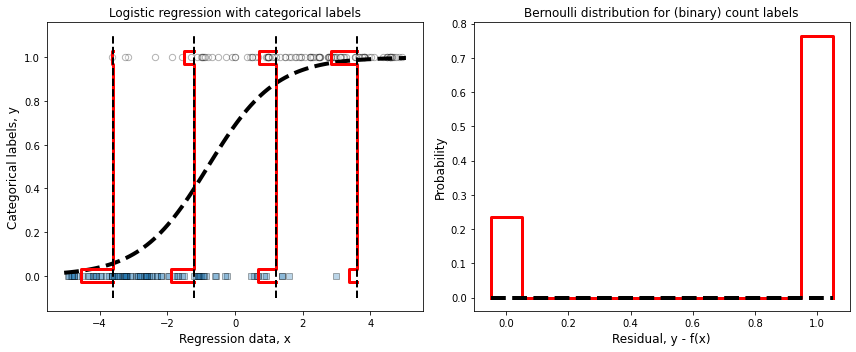

In [11]:
from scipy.stats import bernoulli

# Initialize plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Generate count labels and some distributions
n = 200
X = rng.uniform(low=-5, high=5, size=(n, 1))
f = lambda x: x + 0.8
mu = np.exp(f(X) / (1- f(X)))
p = 1 / (1 + np.exp(-f(X)))
y = rng.binomial(1, p, size=(n, 1))


ax[0].scatter(X[y==0], y[y==0], s=40, marker='s', edgecolor='k', alpha=0.3);
ax[0].scatter(X[y==1], y[y==1], s=40, c='w', marker='o', edgecolor='k', alpha=0.3);

xTrue = np.linspace(start=-5.05, stop=5.05, num=100)
yTrue = f(xTrue)
ax[0].plot(xTrue, 1 / (1 + np.exp(-yTrue)), c='k', linewidth=4, linestyle='--')

for x in [-3.6, -1.2, 1.2, 3.6]:
    th = 1 / (1 + np.exp(-x))
    pos = np.sum(p > th) / n
    xx = [x, x-pos, x-pos, x, x, x-1+pos, x-1+pos, x]
    yy = [-0.03, -0.03, 0.03, 0.03, 0.97, 0.97, 1.03, 1.03]    
    ax[0].plot(xx, yy, c='r', linewidth=3)
    ax[0].plot([x, x], [-0.1, 1.1], c='k', linewidth=2, linestyle='--')
    
ax[0].set_xlabel('Regression data, x', fontsize=12)
ax[0].set_ylabel('Categorical labels, y', fontsize=12)
ax[0].set_title('Logistic regression with categorical labels', fontsize=12)

xx = [-0.05, -0.05, 0.05, 0.05, 0.95, 0.95, 1.05, 1.05]
yy = [0, pos, pos, 0, 0, 1-pos, 1-pos, 0]
ax[1].step(xx, yy, linestyle='-', c='r', linewidth=3)
ax[1].plot(xx, np.full((len(xx), ), 0.0), linestyle='--', c='k', linewidth=4)
ax[1].set_xlabel('Residual, y - f(x)', fontsize=12)
ax[1].set_ylabel('Probability', fontsize=12)
ax[1].set_title('Bernoulli distribution for (binary) count labels', fontsize=12)

fig.tight_layout()
# plt.savefig('./figures/CH07_F05_Kunapuli.png', format='png', dpi=300, bbox_inches='tight')
# plt.savefig('./figures/CH07_F05_Kunapuli.pdf', format='pdf', dpi=300, bbox_inches='tight')